# Import

In [30]:
import pandas as pd
import numpy as np
import nycflights13 as flights  # flights13 데이터 패키지
import re  # 정규 표현식(Regular Expression)을 사용하여 문자열을 처리하기 위한 표준 라이브러리
import seaborn as sns  # 시각화를 위한 패키지
import matplotlib.pyplot as plt

# 폰트설정
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data Load

In [31]:
# 1. 데이터 불러오기
print("=== 데이터 불러오기 ===\n")
df_flights = flights.flights.copy()  # flights 테이블 원본데이터
df_planes = flights.planes.copy()  # planes 테이블 원본데이터
df_airports = flights.airports.copy()

print(f"flights 데이터: {df_flights.shape}")
print(f"planes 데이터: {df_planes.shape}")
print(f"airports 데이터: {df_airports.shape}")

=== 데이터 불러오기 ===

flights 데이터: (336776, 19)
planes 데이터: (3322, 9)
airports 데이터: (1458, 8)


In [32]:
df_flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [33]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

# Missing Value (결측치)

## Flights 결측치 확인

In [34]:
# flights 결측치 컬럼
flights_mv = df_flights.isnull().sum()
flights_mv[flights_mv > 0]

dep_time     8255
dep_delay    8255
arr_time     8713
arr_delay    9430
tailnum      2512
air_time     9430
dtype: int64

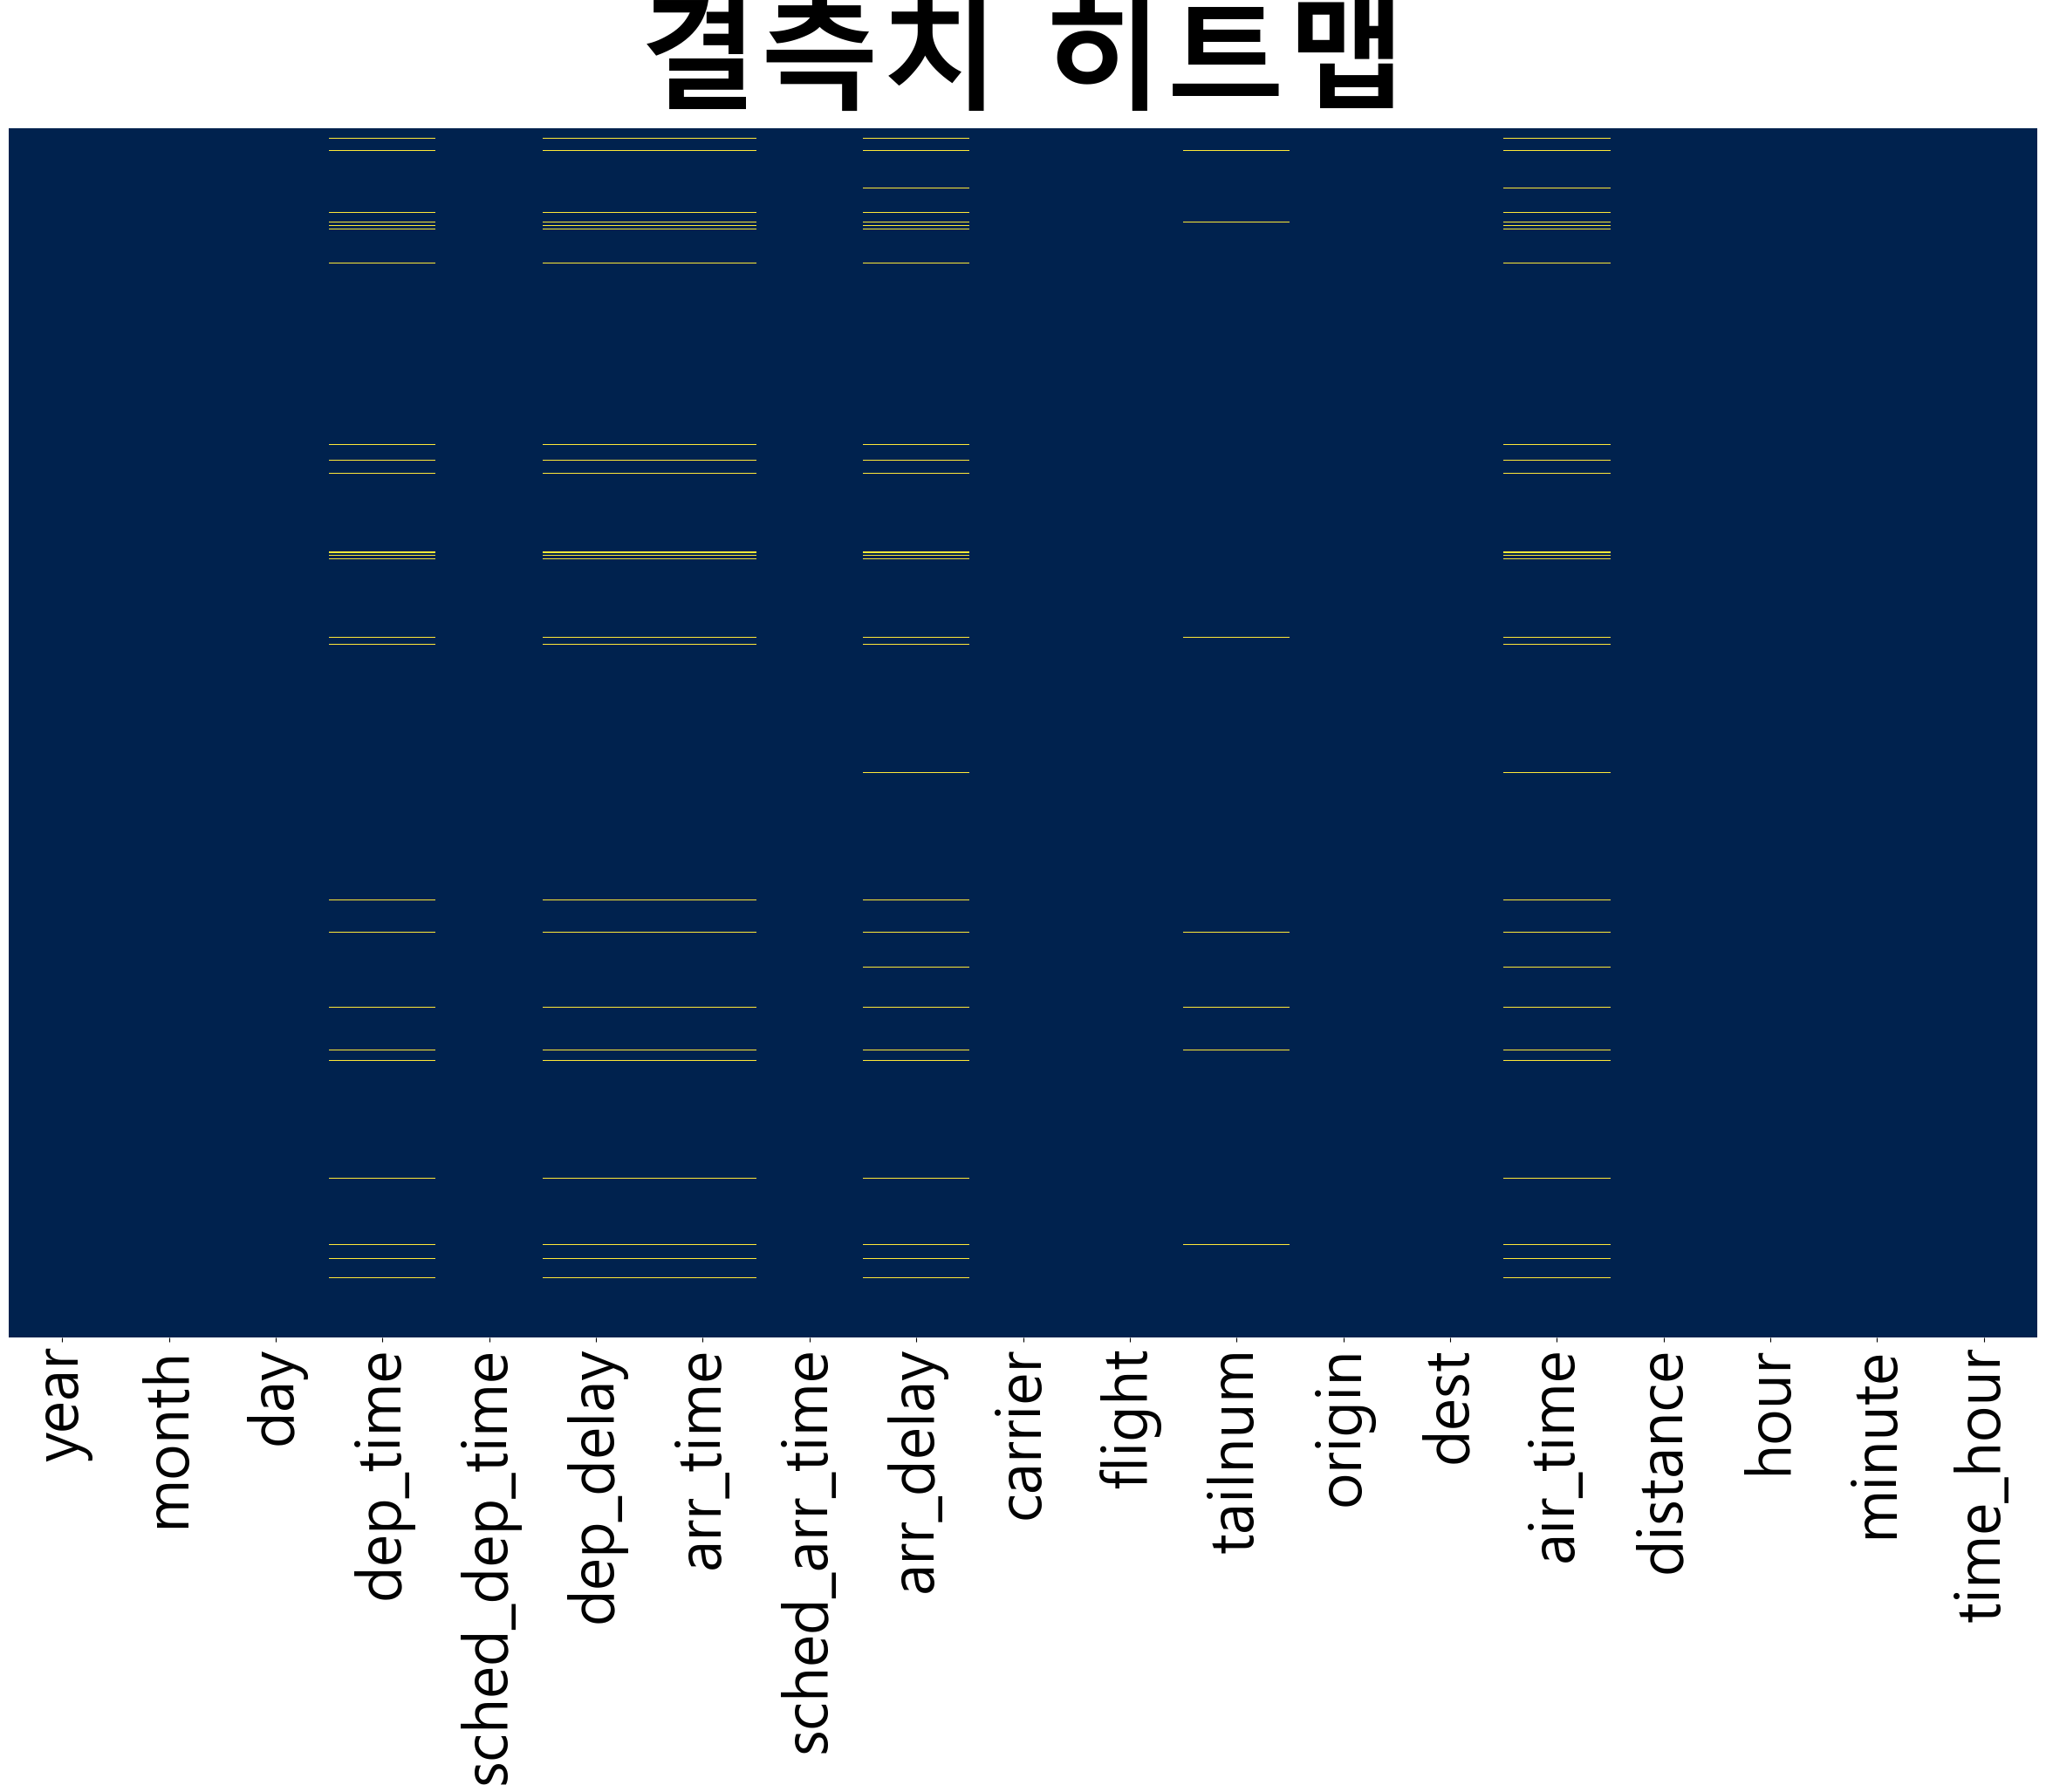

In [35]:
plt.figure(figsize=(30, 18))
sns.heatmap(df_flights.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("결측치 히트맵", fontsize=100, fontdict={'fontweight':'bold'}, pad=10)
plt.xticks(fontsize=50, rotation = 90)
plt.show()

## flights 테이블의 시간 데이터 결측치 처리

In [36]:
# 2. flights 데이터의 결측치 처리 (모두 결측이면 0으로 채우기)
print("\n=== flights 시간 데이터 결측치 처리 ===\n")
time_delay_cols = ['dep_time', 'arr_time', 'dep_delay', 'arr_delay', 'air_time']

print("처리 전 결측치 수:")
for col in time_delay_cols:
    print(f"{col}: {df_flights[col].isna().sum()}")

# 모든 컬럼이 결측인 행 찾기
all_missing_mask = df_flights[time_delay_cols].isna().all(axis=1)
print(f"\n모든 시간/지연 컬럼이 결측인 행의 수: {all_missing_mask.sum()}")
print("이 경우 결항으로 가정합니다")

# 모든 컬럼이 결측인 행만 0으로 채우기 --> 결항된 경우로 생각
df_flights.loc[all_missing_mask, time_delay_cols] = 0
# 모든 컬럼이 결측인 행만 0으로 채우기 --> 결항된 경우로 생각
df_flights.loc[all_missing_mask, "is_canceled"] = True
df_flights.loc[~all_missing_mask, "is_canceled"] = False

print("\n처리 후 결측치 수:")
for col in time_delay_cols:
    print(f"{col}: {df_flights[col].isna().sum()}")
    
print("\n결항 여부 :")
print(df_flights["is_canceled"].value_counts())


=== flights 시간 데이터 결측치 처리 ===

처리 전 결측치 수:
dep_time: 8255
arr_time: 8713
dep_delay: 8255
arr_delay: 9430
air_time: 9430

모든 시간/지연 컬럼이 결측인 행의 수: 8255
이 경우 결항으로 가정합니다

처리 후 결측치 수:
dep_time: 0
arr_time: 458
dep_delay: 0
arr_delay: 1175
air_time: 1175

결항 여부 :
is_canceled
False    328521
True       8255
Name: count, dtype: int64


In [37]:
time_delay_cols2 = ['arr_time', 'arr_delay', 'air_time']

print("처리 전 결측치 수:")
for col in time_delay_cols2:
    print(f"{col}: {df_flights[col].isna().sum()}")

# 모든 컬럼이 결측인 행 찾기
all_missing_mask2 = df_flights[time_delay_cols2].isna().all(axis=1)
print(f"\n모두 결측인 행의 수: {all_missing_mask2.sum()}")

처리 전 결측치 수:
arr_time: 458
arr_delay: 1175
air_time: 1175

모두 결측인 행의 수: 458


In [38]:
time_delay_cols3 = ['arr_delay', 'air_time']
cond1 = df_flights[time_delay_cols3].isna().all(axis=1)
cond2 = df_flights["arr_time"].notna()

print("도착 시간은 있지만, 도착 지연시간과 체공시간이 없는 경우 :", end=' ')
print(len(df_flights[cond1 & cond2]))
df_flights[cond1 & cond2].head()

도착 시간은 있지만, 도착 지연시간과 체공시간이 없는 경우 : 717


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,is_canceled
471,2013,1,1,1525.0,1530,-5.0,1934.0,1805,NaN,MQ,4525,N719MQ,LGA,XNA,NaN,1147,15,30,2013-01-01T20:00:00Z,False
477,2013,1,1,1528.0,1459,29.0,2002.0,1647,NaN,EV,3806,N17108,EWR,STL,NaN,872,14,59,2013-01-01T19:00:00Z,False
615,2013,1,1,1740.0,1745,-5.0,2158.0,2020,NaN,MQ,4413,N739MQ,LGA,XNA,NaN,1147,17,45,2013-01-01T22:00:00Z,False
643,2013,1,1,1807.0,1738,29.0,2251.0,2103,NaN,UA,1228,N31412,EWR,SAN,NaN,2425,17,38,2013-01-01T22:00:00Z,False
725,2013,1,1,1939.0,1840,59.0,29.0,2151,NaN,9E,3325,N905XJ,JFK,DFW,NaN,1391,18,40,2013-01-01T23:00:00Z,False


In [39]:
# arr_time이 결측인 경우 결항으로 넘김
df_flights.loc[all_missing_mask2, time_delay_cols2] = 0
df_flights.loc[all_missing_mask2, "is_canceled"] = True

print("\n처리 후 결측치 수:")
for col in time_delay_cols2:
    print(f"{col}: {df_flights[col].isna().sum()}")
    
print("\n결항 여부 :")
print(df_flights["is_canceled"].value_counts())


처리 후 결측치 수:
arr_time: 0
arr_delay: 717
air_time: 717

결항 여부 :
is_canceled
False    328063
True       8713
Name: count, dtype: int64


In [40]:
# 결항이 아닌경우 arr_delay = sched_arr_time - arr_time
cond = (df_flights["is_canceled"] == False)
df_flights.loc[cond,'arr_delay'] = df_flights.loc[cond,'sched_arr_time'] - df_flights.loc[cond,"arr_time"]

for col in time_delay_cols2:
    print(f"{col}: {df_flights[col].isna().sum()}")

arr_time: 0
arr_delay: 0
air_time: 717


In [41]:
# 푸에르토리코
# SJU / San Juan, Puerto Rico
# PSE / Ponce, Puerto Rico
# BQN / Aguadilla, Puerto Rico
# 미국 동부(뉴욕, UTC-5)보다 1시간 빠른 시간대

In [42]:
# air_time은 현지 시간 반영해줘야함
# 함수: hhmm 형식을 분 단위로 변환
def convert_hhmm_to_minutes(t):
    if pd.isna(t): return np.nan
    t = int(t)
    return (t // 100) * 60 + (t % 100)

# 1. 공항 시간대 정보 병합

df_airports['faa'] = df_airports['faa'].str.upper()
df_flights['dest'] = df_flights['dest'].str.upper()

df_merge = df_flights.merge(df_airports[['faa', 'tz']], left_on='origin', right_on='faa', how='left')
df_merge = df_merge.rename(columns={'tz': 'origin_tz'}).drop(columns='faa')

df_merge = df_merge.merge(df_airports[['faa', 'tz']], left_on='dest', right_on='faa', how='left')
df_merge = df_merge.rename(columns={'tz': 'dest_tz'}).drop(columns='faa')

# dest_tz가 결측인 공항에 대해 수동 시간대 입력 (UTC-4 → -4)
tz_mapping = {'SJU': -4, 'PSE': -4, 'BQN': -4}
df_merge.loc[df_merge['dest'].isin(tz_mapping.keys()), 'dest_tz'] = df_merge['dest'].map(tz_mapping)

# 2. hhmm을 분으로 변환
df_merge['dep_minutes'] = df_merge['dep_time'].apply(convert_hhmm_to_minutes)
df_merge['arr_minutes'] = df_merge['arr_time'].apply(convert_hhmm_to_minutes)

# 3. 현지 시간을 UTC 기준으로 조정
df_merge['dep_utc_min'] = df_merge['dep_minutes'] - df_merge['origin_tz'] * 60
df_merge['arr_utc_min'] = df_merge['arr_minutes'] - df_merge['dest_tz'] * 60

# 4. 체공시간 계산
df_merge['calc_air_time'] = df_merge['arr_utc_min'] - df_merge['dep_utc_min']

# 5. 도착일이 하루 뒤인 경우 보정
df_merge.loc[df_merge['calc_air_time'] < 0, 'calc_air_time'] += 1440

# 6. 결측치 보간
df_merge.loc[df_merge['air_time'].isna(), 'air_time'] = df_merge['calc_air_time']

In [43]:
for col in time_delay_cols2:
    print(f"{col}: {df_merge[col].isna().sum()}")

arr_time: 0
arr_delay: 0
air_time: 0


In [44]:
df = df_merge[df_flights.columns]
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,is_canceled
0,2013,1,1,517.0,515,2.0,830.0,819,-11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,False
1,2013,1,1,533.0,529,4.0,850.0,830,-20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,False
2,2013,1,1,542.0,540,2.0,923.0,850,-73.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,False
3,2013,1,1,544.0,545,-1.0,1004.0,1022,18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,False
4,2013,1,1,554.0,600,-6.0,812.0,837,25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,False


C:\Users\USER\AppData\Local\Temp\ipykernel_16636\1832075930.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_canceled', data=df, palette='pastel')


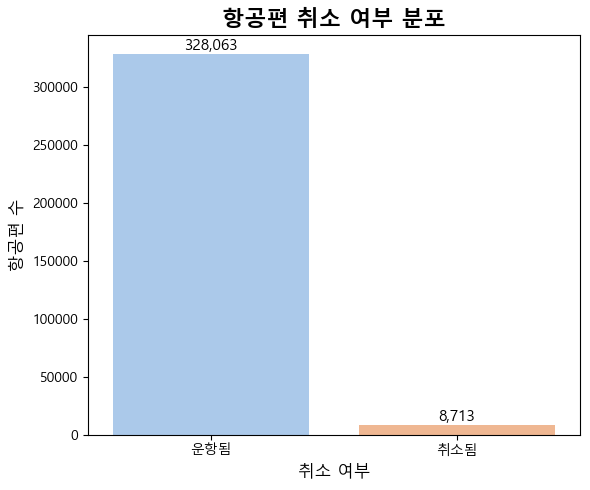

In [45]:
# 카운트 시각화

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

plt.figure(figsize=(6, 5))
sns.countplot(x='is_canceled', data=df, palette='pastel')

# 그래프 제목 및 라벨
plt.title('항공편 취소 여부 분포', fontsize=16, fontweight='bold')
plt.xlabel('취소 여부', fontsize=12)
plt.ylabel('항공편 수', fontsize=12)
plt.xticks([0, 1], ['운항됨', '취소됨'])

# 수치 라벨 표시 (선택)
for p in plt.gca().patches:
    count = int(p.get_height())
    plt.gca().annotate(f'{count:,}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                       ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

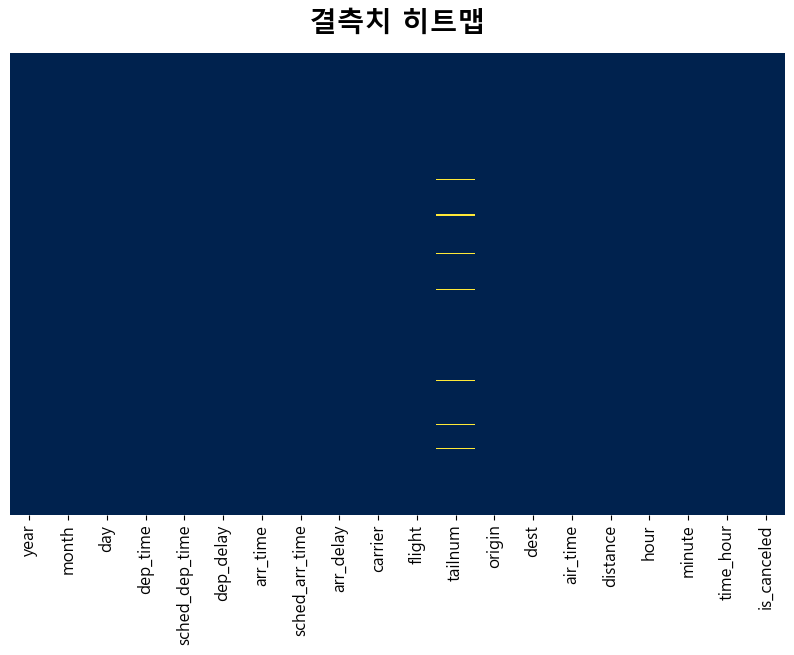

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis', yticklabels=False)
plt.title("결측치 히트맵", fontsize=20, fontdict={'fontweight':'bold'}, pad=15)
plt.xticks(fontsize=12)
plt.show()

In [47]:
df.shape

(336776, 20)

## flights 테이블 tailnum, model 결측치 처리 1

### flights 테이블 tailnum 정제

In [48]:
# 3. tailnum 전처리 (양쪽 데이터프레임)
print("\n=== tailnum 전처리 ===\n")

df_copy = df.copy()

print("정제 전 결측치 수:")
print(f"tailnum: {df_copy['tailnum'].isna().sum()}")

# tailnum 정제 - NaN을 고유 문자열로 임시 대체
for df_temp in [df_copy, df_planes]:
    df_temp['tailnum_clean'] = df_temp['tailnum'].astype(str).str.strip().str.upper()
    
print("\nNaN을 고유 문자열로 임시 대체")
    
print("\n정제 후 결측치 수:")
print(f"tailnum 결측치: {df_copy['tailnum_clean'].isna().sum()}")



=== tailnum 전처리 ===

정제 전 결측치 수:
tailnum: 2512

NaN을 고유 문자열로 임시 대체

정제 후 결측치 수:
tailnum 결측치: 0


### flights 테이블과 planes 테이블 병합

In [49]:
# 4. flights 테이블과 planes 테이블
print("\n=== planes 테이블 병합 ===\n")
df_merge = pd.merge(df_copy, df_planes, on='tailnum_clean', how='left', suffixes=('', '_plane'))
print(f"병합 후 데이터 형태: {df_merge.shape}")

# planes 테이블의 year 컬럼이 year_plane으로 변경되었는지 확인
if 'year_plane' not in df_merge.columns and 'year_y' in df_merge.columns:
    df_merge.rename(columns={'year_y': 'year_plane'}, inplace=True)
elif 'year_plane' not in df_merge.columns and 'year' in df_planes.columns:
    # suffixes가 제대로 적용되지 않은 경우 수동으로 처리
    planes_rename = df_planes.rename(columns={'year': 'year_plane'})
    df_merge = pd.merge(df_copy, planes_rename, on='tailnum_clean', how='left')

print("병합 후 year 관련 컬럼:")
year_cols = [col for col in df_merge.columns if 'year' in col.lower()]
print(year_cols)


=== planes 테이블 병합 ===

병합 후 데이터 형태: (336776, 30)
병합 후 year 관련 컬럼:
['year', 'year_plane']


### tailnum 컬럼에서 숫자와 접미사 추출

In [50]:
# 5. tailnum에서 숫자와 접미사 추출
print("\n=== tailnum 파싱 (숫자 + 접미사 추출) ===\n")
def parse_tailnum(tail):
    """tailnum에서 숫자와 접미사를 분리"""
    if not isinstance(tail, str) or not tail.startswith('N'):
        return np.nan, np.nan
    
    #입력이 문자열이 아니거나
    # 'N'으로 시작하지 않으면 → 유효하지 않다고 판단하고 (NaN, NaN) 반환
    
    tail = tail[1:]  # 'N' 제거
    match = re.match(r"(\d+)([A-Z]*)$", tail)
    
    if match:
        num = int(match.group(1))
        suffix = match.group(2) if match.group(2) else np.nan
        return num, suffix
    return np.nan, np.nan

# 숫자와 접미사 추출
parsed_tailnum = df_merge['tailnum_clean'].apply(parse_tailnum)
df_merge['tailnum_num'] = parsed_tailnum.apply(lambda x: x[0])
df_merge['tail_suffix'] = parsed_tailnum.apply(lambda x: x[1])

print(f"tailnum_num 추출 성공: {df_merge['tailnum_num'].notna().sum()}")
print(f"tail_suffix 추출 성공: {df_merge['tail_suffix'].notna().sum()}")


=== tailnum 파싱 (숫자 + 접미사 추출) ===

tailnum_num 추출 성공: 334260
tail_suffix 추출 성공: 259046


In [51]:
df_merge.loc[df_merge['tail_suffix'].isna(), ["tailnum_clean", "tail_suffix"]].tail()

,tailnum_clean,tail_suffix
336752,N12957,NaN
336756,N10575,NaN
336760,N12145,NaN
336771,NAN,NaN
336772,NAN,NaN


### tailnum 결측치 채우기

In [52]:
# # 6. model 결측치 채우기 (접미사-번호 기준 가장 가까운 모델)
# print("\n=== 6. model 결측치 채우기 ===")
# print(f"model 결측치 (처리 전): {df['model'].isna().sum()}")

# # 모델이 있는 데이터만 참조용으로 사용
# ref_model = df.loc[df['model'].notna(), ['tailnum_num', 'tail_suffix', 'model']].copy()

# # 접미사가 없는 경우를 'NO_SUFFIX'로 처리
# ref_model['tail_suffix'] = ref_model['tail_suffix'].fillna('NO_SUFFIX')

# # 접미사별로 번호/모델 딕셔너리 생성 (빠른 검색용)
# suffix_dict = {}
# for suffix, group in ref_model.groupby('tail_suffix'):
#     suffix_dict[suffix] = group[['tailnum_num', 'model']].values

# print(f"접미사 종류: {list(suffix_dict.keys())}")
# print(f"각 접미사별 데이터 개수: {[len(arr) for arr in suffix_dict.values()]}")

# def find_nearest_model(row):
#     """가장 가까운 번호의 모델 찾기"""
#     if pd.notna(row['model']):
#         return row['model']
    
#     num = row['tailnum_num']
#     suffix = row['tail_suffix'] if pd.notna(row['tail_suffix']) else 'NO_SUFFIX'
    
#     # 숫자가 없으면 처리 불가
#     if pd.isna(num):
#         return np.nan
    
#     # 1순위: 같은 접미사에서 찾기
#     if suffix in suffix_dict and len(suffix_dict[suffix]) > 0:
#         arr = suffix_dict[suffix]
#         closest_idx = np.abs(arr[:, 0] - num).argmin()
#         return arr[closest_idx, 1]
    
#     # 2순위: 접미사가 없는 경우 전체에서 가장 가까운 번호 찾기
#     if suffix == 'NO_SUFFIX':
#         all_data = np.vstack(list(suffix_dict.values()))
#         if len(all_data) > 0:
#             closest_idx = np.abs(all_data[:, 0] - num).argmin()
#             return all_data[closest_idx, 1]
    
#     return np.nan

# df['model'] = df.apply(find_nearest_model, axis=1)
# print(f"model 결측치 (처리 후): {df['model'].isna().sum()}")

In [53]:
# 1. 모델 정보가 있는 데이터만 선택 (결측치 없는 샘플만)
df_model_known = df_merge[df_merge['model'].notna()].copy()

# 2. 평가용 샘플 생성
#    전체 중 5만 개를 랜덤 샘플링하여 평가용으로 분리
eval_sample = df_model_known.sample(50000, random_state=42).copy()
original_model = eval_sample['model'].copy()  # 원래 모델 정보 따로 저장 (정답)
eval_sample['model'] = np.nan  # 평가를 위해 모델 정보를 결측치로 만듦 (숨김)

# 3. 평가 샘플을 원본 데이터와 합침
#    이렇게 하면 평가용 샘플은 'model'이 결측치, 나머지는 원래 값 유지
df_for_test = pd.concat([df_merge, eval_sample])
#    동일한 tailnum(항공기 꼬리번호)가 중복될 수 있으므로 마지막 데이터(평가용)를 우선으로 유지하며 중복 제거
df_for_test.drop_duplicates(subset=['tailnum'], keep='last', inplace=True)

# 4. 결측치 보간에 사용할 참조 데이터 준비
#    model이 존재하는 데이터만 선택 (참조용)
ref_model = df_for_test[df_for_test['model'].notna()][['tailnum_num', 'tail_suffix', 'model']].copy()
#    접미사(tail_suffix) 결측치는 'NO_SUFFIX'로 대체하여 그룹화 시 누락 방지
ref_model['tail_suffix'] = ref_model['tail_suffix'].fillna('NO_SUFFIX')

#    접미사별로 tailnum_num과 model을 배열 형태로 저장하는 딕셔너리 생성
suffix_dict = {}
for suffix, group in ref_model.groupby('tail_suffix'):
    suffix_dict[suffix] = group[['tailnum_num', 'model']].values

# 5. 결측치 보간 함수 정의
def find_nearest_model(row):
    # 만약 원래 model 값이 존재하면 그대로 반환 (평가용 샘플 외 데이터)
    if pd.notna(row['model']):
        return row['model']
    
    num = row['tailnum_num']  # tailnum에서 숫자 부분
    suffix = row['tail_suffix'] if pd.notna(row['tail_suffix']) else 'NO_SUFFIX'  # 접미사, 없으면 'NO_SUFFIX'
    
    # 숫자 부분이 없으면 보간 불가
    if pd.isna(num):
        return np.nan
    
    # 접미사 기준으로 가장 가까운 숫자 모델 탐색
    if suffix in suffix_dict and len(suffix_dict[suffix]) > 0:
        arr = suffix_dict[suffix]  # (tailnum_num, model) 배열
        closest_idx = np.abs(arr[:, 0] - num).argmin()  # 숫자 차이가 가장 적은 인덱스 찾기
        return arr[closest_idx, 1]  # 해당 인덱스의 모델 반환
    
    # 접미사가 'NO_SUFFIX'인 경우, 모든 데이터를 통틀어 가장 가까운 모델 찾기
    if suffix == 'NO_SUFFIX':
        all_data = np.vstack(list(suffix_dict.values()))  # 모든 접미사 데이터를 수직 결합
        if len(all_data) > 0:
            closest_idx = np.abs(all_data[:, 0] - num).argmin()
            return all_data[closest_idx, 1]
    
    # 그 외의 경우 보간 불가
    return np.nan

# 6. 평가용 샘플에 보간 함수 적용하여 모델 예측
eval_sample_filled = eval_sample.copy()
eval_sample_filled['model_pred'] = eval_sample_filled.apply(find_nearest_model, axis=1)

# 7. 예측 결과와 원래 모델 비교하여 정확도 계산
correct = (eval_sample_filled['model_pred'] == original_model)  # 일치 여부 불리언 시리즈
accuracy = correct.sum() / len(correct)  # 전체 대비 맞은 비율

print(f"\n모델 보간 정확도: {accuracy:.2%} ({correct.sum()} / {len(correct)})")



모델 보간 정확도: 8.12% (4058 / 50000)


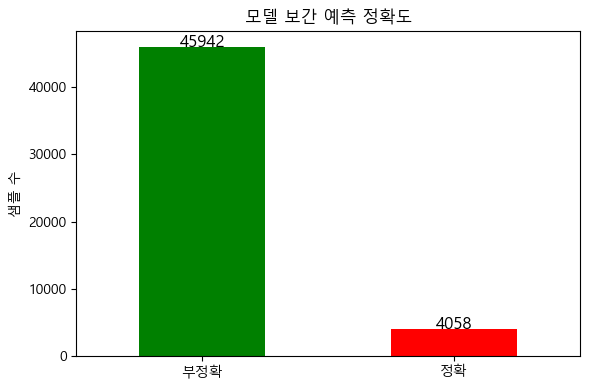

In [54]:
# 맞은 경우, 틀린 경우 개수 집계
accuracy_counts = correct.value_counts().rename({True: '정확', False: '부정확'})

# 시각화
plt.figure(figsize=(6,4))
accuracy_counts.plot(kind='bar', color=['green', 'red'])
plt.title('모델 보간 예측 정확도')
plt.ylabel('샘플 수')
plt.xticks(rotation=0)
plt.tight_layout()

# 정확도 텍스트 출력
for idx, val in enumerate(accuracy_counts):
    plt.text(idx, val + 5, f'{val}', ha='center', fontsize=12)

plt.show()


## flights 테이블 tailnum, model 결측치 처리 2

### 결측값 확인

In [55]:
# 병합
df_merge = pd.merge(df_copy, df_planes, on='tailnum_clean', how='left', suffixes=('', '_plane'))

# 전체 tailnum, model 결측치 개수와 비율
total_rows = df_merge.shape[0]
missing_tailnum_count = df_merge['tailnum'].isna().sum()
missing_tailnum_ratio = missing_tailnum_count / total_rows * 100

missing_model_count = df_merge['model'].isna().sum()
missing_model_ratio = missing_model_count / total_rows * 100

print(f"총 행 개수: {total_rows}")
print(f"\ntailnum 결측치 개수: {missing_tailnum_count}")
print(f"tailnum 결측치 비율: {missing_tailnum_ratio:.2f}%")
print(f"\nmodel 결측치 개수: {missing_model_count}")
print(f"model 결측치 비율: {missing_model_ratio:.2f}%")

총 행 개수: 336776

tailnum 결측치 개수: 2512
tailnum 결측치 비율: 0.75%

model 결측치 개수: 52606
model 결측치 비율: 15.62%


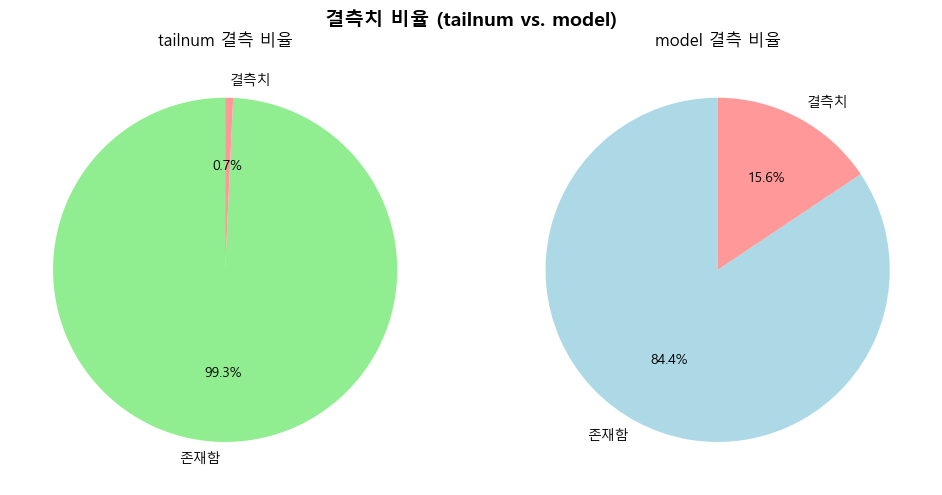

In [56]:
labels = ['존재함', '결측치']
tailnum_values = [total_rows - missing_tailnum_count, missing_tailnum_count]
model_values = [total_rows - missing_model_count, missing_model_count]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# tailnum
axs[0].pie(tailnum_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#90ee90', '#ff9999'])
axs[0].set_title('tailnum 결측 비율')

# model
axs[1].pie(model_values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#add8e6', '#ff9999'])
axs[1].set_title('model 결측 비율')

plt.suptitle('결측치 비율 (tailnum vs. model)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [57]:
print("\n=== tailnum 파싱 (숫자 + 접미사 추출) ===\n")
def parse_tailnum(tail):
    """tailnum에서 숫자와 접미사를 분리"""
    if not isinstance(tail, str) or not tail.startswith('N'):
        return np.nan, np.nan
    
    #입력이 문자열이 아니거나
    # 'N'으로 시작하지 않으면 → 유효하지 않다고 판단하고 (NaN, NaN) 반환
    
    tail = tail[1:]  # 'N' 제거
    match = re.match(r"(\d+)([A-Z]*)$", tail)
    
    if match:
        num = int(match.group(1))
        suffix = match.group(2) if match.group(2) else np.nan
        return num, suffix
    return np.nan, np.nan

# 숫자와 접미사 추출
parsed_tailnum = df_merge['tailnum_clean'].apply(parse_tailnum)
df_merge['tailnum_num'] = parsed_tailnum.apply(lambda x: x[0])
df_merge['tail_suffix'] = parsed_tailnum.apply(lambda x: x[1])

print(f"tailnum_num 추출 성공: {df_merge['tailnum_num'].notna().sum()}")
print(f"tail_suffix 추출 성공: {df_merge['tail_suffix'].notna().sum()}")


=== tailnum 파싱 (숫자 + 접미사 추출) ===

tailnum_num 추출 성공: 334260
tail_suffix 추출 성공: 259046


### 결측값 채우기 전략

결측된 model을 채우기 위해 tailnum 기반으로 planes에서 모델 정보를 가져옴. 하지만 다음과 같은 문제가 발생 가능.

- tailnum이 아예 결측인 경우 (model도 알 수 없음)

- tailnum이 존재하지만 planes 테이블에 정보가 없는 경우

따라서 결측값을 다음 기준으로 채울 수 있음
1. tailnum이 있고 planes에 존재할 경우: model을 그대로 merge하여 채움
2. tailnum이 아예 없거나 planes에 존재하지 않을 경우: model은 여전히 NaN으로 남음

In [70]:
# # top 10 모델 추출
# top_models = df_merge['model'].value_counts().nlargest(10).index
# df_top = df_merge[df_merge['model'].isin(top_models)]

# # 접미사별 모델 분포 테이블 (pivot)
# pivot_table = pd.pivot_table(df_top, index='tailnum_suffix', columns='model', aggfunc='size', fill_value=0)

# # 누적 막대그래프 그리기
# pivot_table = pivot_table.loc[sorted(pivot_table.index)]  # 접미사 정렬

# fig, ax = plt.subplots(figsize=(14, 8))

# bottom = pd.Series([0]*len(pivot_table), index=pivot_table.index)  # 누적 위치 초기화

# for model in pivot_table.columns:
#     ax.bar(pivot_table.index, pivot_table[model], bottom=bottom, label=model)
#     bottom += pivot_table[model]  # 다음 막대 위치 누적

# ax.set_title('tailnum 접미사별 상위 10개 모델 분포 (누적 막대그래프)')
# ax.set_xlabel('tailnum 접미사 (문자)')
# ax.set_ylabel('항공기 수량')
# ax.legend(title='항공기 모델', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [ ]:
# # tailnum 숫자 구간별 모델 분포 (숫자대 분석)
# # 숫자를 구간으로 나누기
# df_top['tailnum_range'] = pd.cut(df_top['tailnum_num'], bins=[0, 1000, 5000, 10000, 20000, 50000, 99999],
#                                  labels=['<1K', '1K-5K', '5K-10K', '10K-20K', '20K-50K', '50K+'])

# plt.figure(figsize=(12, 6))
# sns.countplot(data=df_top, x='tailnum_range', hue='model')
# plt.title('tailnum 숫자 vs. 항공기 모델 (Top 10)')
# plt.xlabel('tailnum 숫자')
# plt.ylabel('Count')
# plt.legend(title='항공기 모델', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

FAA : 미국의 연방항공청

- 미국 FAA의 tailnum(항공기 등록번호)은 예약 가능한 영문자+숫자 조합에서 항공사 자율성이 크고, 연속적이지 않을 수도 있음. 특히 숫자가 "등록 순서"를 정확히 반영한다고 보기 어려움.

예를 들어 A320-232가 <1K에서 비정상적으로 많은 건, JetBlue나 특정 항공사의 tailnum 등록 패턴 때문일 수 있음. 이는 모델과 tailnum 숫자 사이의 일반적인 관계로 보기 어려움.

- 한 해의 데이터셋을 보기때문에 편향적으로 나타날 가능성이 높음

C:\Users\USER\AppData\Local\Temp\ipykernel_16636\946544889.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=labels, y=values, palette=colors)


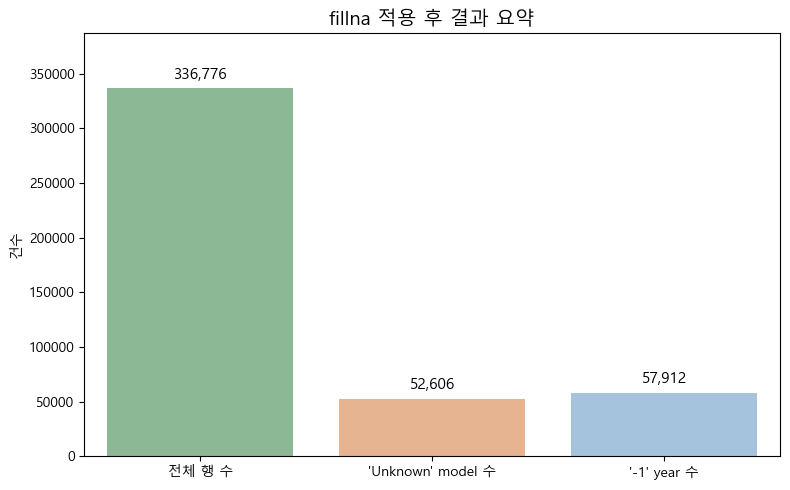

In [59]:
# 복사
new_df = df_merge.copy()

# 처리 전 통계
total_before = len(new_df)
missing_model = new_df['model'].isna().sum()
missing_year = new_df['year_plane'].isna().sum()  # year 컬럼명 확인 필요

# 전략 1: dropna 둘 다 결측치 제거
df_drop = new_df.dropna(subset=['tailnum', 'model', 'year_plane'])
total_drop = len(df_drop)

# 전략 2: fillna
df_fill = new_df.copy()
df_fill['tailnum'] = df_fill['tailnum'].fillna('Unknown')
df_fill['model'] = df_fill['model'].fillna('Unknown')
df_fill['year_plane'] = df_fill['year_plane'].fillna(
    df_fill.groupby('tailnum')['year_plane'].transform('mean')
).round().astype('Int64')
df_fill['year_plane'] = df_fill['year_plane'].fillna(-1)

# 값 계산
total_fill = len(df_fill)
unknown_model = (df_fill['model'] == 'Unknown').sum()
minus1_year = (df_fill['year_plane'] == -1).sum()

# 시각화 준비
labels = ['전체 행 수', "'Unknown' model 수", "'-1' year 수"]
values = [total_fill, unknown_model, minus1_year]
colors = ['#86bf91', '#f4b183', '#9dc3e6']

# 시각화
plt.figure(figsize=(8, 5))
barplot = sns.barplot(x=labels, y=values, palette=colors)

# 막대 위 숫자 표시
for i, val in enumerate(values):
    barplot.text(i, val + total_fill * 0.015, f"{val:,}", ha='center', va='bottom', fontsize=11)

plt.title("fillna 적용 후 결과 요약", fontsize=14)
plt.ylabel("건수")
plt.ylim(0, total_fill * 1.15)
plt.tight_layout()
plt.show()

In [ ]:
# 기종 기반 정밀 분석(지연률, 기체 성능 등) → dropna 처리

# 운항량/날씨 연관 등 전체 데이터 흐름 중요 →'Unknown'으로 채움

C:\Users\USER\AppData\Local\Temp\ipykernel_16636\2030142928.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_tailnum_counts.values, y=model_tailnum_counts.index, palette='Blues_d')


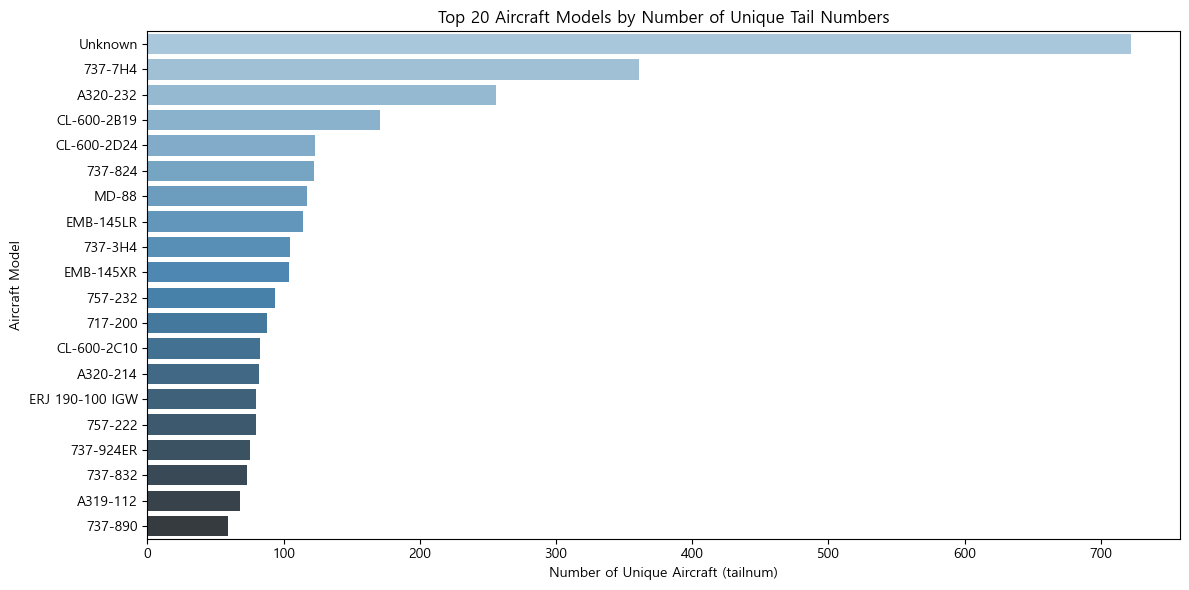

In [60]:
# 모델별 고유 tailnum 수 카운트
model_tailnum_counts = df_fill.groupby('model')['tailnum'].nunique().sort_values(ascending=False).head(20)

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=model_tailnum_counts.values, y=model_tailnum_counts.index, palette='Blues_d')
plt.title("Top 20 Aircraft Models by Number of Unique Tail Numbers")
plt.xlabel("Number of Unique Aircraft (tailnum)")
plt.ylabel("Aircraft Model")
plt.tight_layout()
plt.show()

## flights 테이블 year 컬럼 결측치 채우기

In [ ]:
print("\n=== year 결측치 채우기 (최적화) ===")
print(f"year 결측치 (처리 전): {df['year_plane'].isna().sum()}")

 #1. year가 있는 데이터만 사전처리
year_ref = df[df['year_plane'].notna()].copy()
year_ref['tail_suffix'] = year_ref['tail_suffix'].fillna('NO_SUFFIX')

# 2. (model, suffix) 그룹으로 묶고 사전 생성
grouped_ref = {}
for (model, suffix), group in year_ref.groupby(['model', 'tail_suffix']):
    sorted_group = group[['tailnum_num', 'year_plane']].dropna().sort_values('tailnum_num')
    grouped_ref[(model, suffix)] = sorted_group.reset_index(drop=True)

# 3. 결측치 대상 행만 선택
missing_idx = df[df['year_plane'].isna()].index

# 4. 벡터화된 보간 함수 준비
def fast_interpolate(row):
    model = row['model']
    suffix = row['tail_suffix'] if pd.notna(row['tail_suffix']) else 'NO_SUFFIX'
    tailnum_num = row['tailnum_num']
    
    if pd.isna(model) or pd.isna(tailnum_num):
        return np.nan

    key = (model, suffix)
    if key not in grouped_ref:
        return np.nan
    
    group = grouped_ref[key]
    nums = group['tailnum_num'].values
    years = group['year_plane'].values

    idx_after = np.searchsorted(nums, tailnum_num, side='right')
    idx_before = idx_after - 1

    if 0 <= idx_before < len(nums) and idx_after < len(nums):
        return int(round(np.mean([years[idx_before], years[idx_after]])))
    elif idx_before < 0 and idx_after < len(nums):
        return int(years[idx_after])
    elif 0 <= idx_before < len(nums) and idx_after >= len(nums):
        return int(round(np.mean([years[idx_before], 2013])))
    else:
        return np.nan

# 5. 결측치에만 적용 (병렬 아님)
df.loc[missing_idx, 'year_plane'] = df.loc[missing_idx].apply(fast_interpolate, axis=1)

# 6. 결과 확인
print(f"year 결측치 (처리 후): {df['year_plane'].isna().sum()}")


In [ ]:
missing_before = df['year_plane'].isna().sum() + df['year_plane'].notna().sum() - df.shape[0]  # 적용 전 결측 수 추정
missing_after = df['year_plane'].isna().sum()

plt.figure(figsize=(6, 4))
plt.bar(['보간 전', '보간 후'], [missing_before, missing_after], color=['#ff9999', '#90ee90'])

for i, v in enumerate([missing_before, missing_after]):
    plt.text(i, v + 50, f'{v:,}', ha='center', va='bottom', fontsize=11)

plt.title('year_plane 결측치 처리 전후 비교', fontsize=13, fontweight='bold')
plt.ylabel('결측치 수')
plt.tight_layout()
plt.show()

In [61]:
# 8. 결과 확인
# df_drop
print("\n=== 최종 결과 확인 ===")
print("주요 컬럼 결측치 현황:")
key_cols = ['tailnum', 'model', 'year_plane']
for col in key_cols:
    if col in df_drop.columns:
        missing_count = df_drop[col].isna().sum()
        print(f"{col}: {missing_count} ({missing_count/len(df_drop)*100:.1f}%)")


=== 최종 결과 확인 ===
주요 컬럼 결측치 현황:
tailnum: 0 (0.0%)
model: 0 (0.0%)
year_plane: 0 (0.0%)


In [62]:
# 8. 결과 확인
# df_fill
print("\n=== 8. 최종 결과 확인 ===")
print("주요 컬럼 결측치 현황:")
key_cols = ['tailnum', 'model', 'year_plane']
for col in key_cols:
    if col in df_fill.columns:
        missing_count = df_fill[col].isna().sum()
        print(f"{col}: {missing_count} ({missing_count/len(df_fill)*100:.1f}%)")


=== 8. 최종 결과 확인 ===
주요 컬럼 결측치 현황:
tailnum: 0 (0.0%)
model: 0 (0.0%)
year_plane: 0 (0.0%)


# Duplicate values (중복값)

In [63]:
# 완전히 중복된 행 확인
duplicated_rows = df_drop[df_drop.duplicated(keep=False)]
num_duplicates = duplicated_rows.shape[0]

print(f"완전히 중복된 행 수: {num_duplicates}")

완전히 중복된 행 수: 0


In [64]:
# 완전히 중복된 행 확인
duplicated_rows = df_fill[df_fill.duplicated(keep=False)]
num_duplicates = duplicated_rows.shape[0]

print(f"완전히 중복된 행 수: {num_duplicates}")

완전히 중복된 행 수: 0


# Select columns to use (사용할 컬럼 추출)

In [65]:
selected_columns = ['year', 'month', 'day', 'hour',
                    'dep_time', 'sched_dep_time', 'dep_delay',
                    'arr_time', 'sched_arr_time', 'arr_delay', 
                    'carrier', 'flight', 'origin', 'dest', 'tailnum', 'year_plane', 'model']

In [66]:
df_drop = df_drop[selected_columns]
df_fill = df_fill[selected_columns]

In [67]:
df_drop.isna().sum()

year              0
month             0
day               0
hour              0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
tailnum           0
year_plane        0
model             0
dtype: int64

In [68]:
df_fill.isna().sum()

year              0
month             0
day               0
hour              0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
origin            0
dest              0
tailnum           0
year_plane        0
model             0
dtype: int64

# 최종 데이터프레임 저장

In [69]:
df_drop.to_csv("./data/df_drop.csv", index=False)
df_fill.to_csv("./data/df_fill.csv", index=False)